<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M18_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files
import io

In [3]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=';')
print(df.head())

Saving ALUGUEL_MOD12.csv to ALUGUEL_MOD12.csv
   Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0            480               295        48          2            2   
1            500                 0        50          1            2   
2            500                 0        40          1            2   
3            500                36        45          1            2   
4            500                 0        30          1            1   

   N_Suites  N_Vagas  
0         1        1  
1         1        1  
2         1        1  
3         1        0  
4         0        0  


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
# A) Verificando os tipos de dados

print(df.dtypes)

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object


In [5]:
# --- B) Verificação e tratamento de dados faltantes ---

faltantes = df.isnull().sum()
print(faltantes)
print("-" * 30)


if faltantes.sum() > 0:
    for coluna in df.columns:
        if df[coluna].isnull().sum() > 0:
            mediana = df[coluna].median()
            df[coluna] = df[coluna].fillna(mediana)
            print(f"Coluna '{coluna}': Dados faltantes preenchidos com a mediana ({mediana}).")
else:
    print("Não foram encontrados dados faltantes no dataset.")


print("\n### Dataset após processamento ###")
print(df.info())

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64
------------------------------
Não foram encontrados dados faltantes no dataset.

### Dataset após processamento ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB
None


Exemplo de remoção: se a quantidade for ínfima (ex: menos de 5%) ou substituição pela mediana se forem dados numéricos
    
Justificativa: Para dados imobiliários (aluguel, vagas), a 'mediana' é preferível à 'média' pois é menos sensível a outliers (imóveis de luxo).

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [47]:
# --- A) Estatística Descritiva ---
print(df.describe())

       Valor_Aluguel  Valor_Condominio     Metragem    N_Quartos  N_banheiros  \
count    7203.000000       7203.000000  7203.000000  7203.000000  7203.000000   
mean     2966.596140        811.538109    88.506178     2.300153     2.095932   
std      2948.720385        796.564846    61.567505     0.826615     0.983812   
min       480.000000          0.000000    30.000000     1.000000     1.000000   
25%      1350.000000        395.000000    52.000000     2.000000     2.000000   
50%      2000.000000        592.000000    67.000000     2.000000     2.000000   
75%      3200.000000        980.000000   100.000000     3.000000     2.000000   
max     25000.000000       9500.000000   880.000000    10.000000     8.000000   

          N_Suites     N_Vagas  
count  7203.000000  7203.00000  
mean      1.016660     1.44176  
std       0.874204     0.86993  
min       0.000000     0.00000  
25%       1.000000     1.00000  
50%       1.000000     1.00000  
75%       1.000000     2.00000  
max   

In [55]:
# --- B) Tratamento de Outliers (Exemplo: Valor_Aluguel) ---

Q1 = df['Valor_Aluguel'].quantile(0.25)
Q3 = df['Valor_Aluguel'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# Justificativa: Utilizamos o IQR (Intervalo Interquartil) para remover apenas o
# "topo" da pirâmide de preços (imóveis de luxo fora do padrão), mantendo a base fidedigna.
df_clean = df[df['Valor_Aluguel'] <= limite_superior].copy()
print(f"Outliers removidos. Limite superior: {limite_superior}")
print(f"Registros antes: {len(df)} | Registros atuais: {len(df_clean)}")

Outliers removidos. Limite superior: 5975.0
Registros antes: 7203 | Registros atuais: 6454


Observando o describe, se o valor máximo estiver muito distante da média/mediana, temos outliers. Vamos usar o método IQR para a coluna 'Valor_Aluguel'.

In [56]:
# --- C) Análise Bivariada (3 Gráficos) ---
sns.set_theme(style="whitegrid")

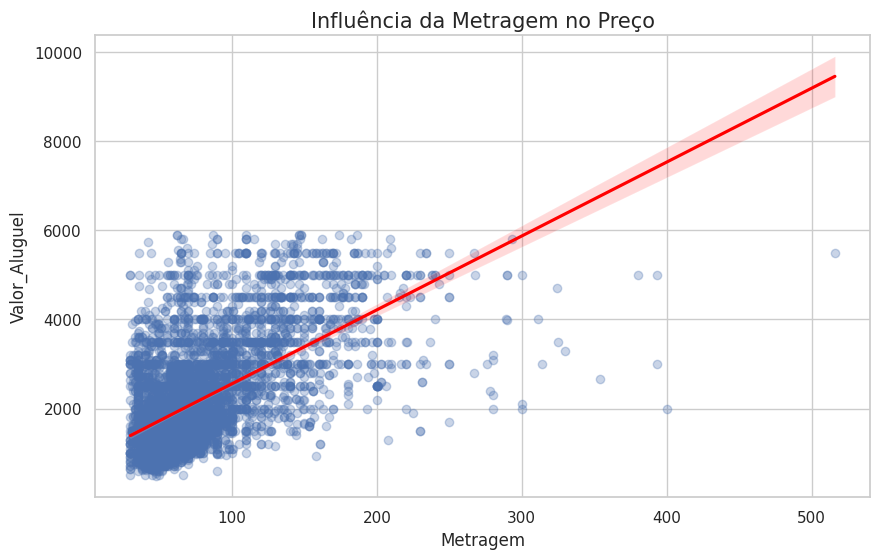

In [57]:
# Gráfico 1: Regressão (Metragem vs Valor_Aluguel)
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='Metragem', y='Valor_Aluguel', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Influência da Metragem no Preço', fontsize=15)
plt.show()

Metragem vs. Valor (Regressão): A linha de tendência mostra se o preço sobe de forma constante com o tamanho. Se houver muitos pontos dispersos longe da linha, significa que o tamanho não é o único fator (a localização ou o estado do imóvel podem pesar mais)

/tmp/ipython-input-2942954006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='N_Suites', y='Valor_Aluguel', palette='magma')


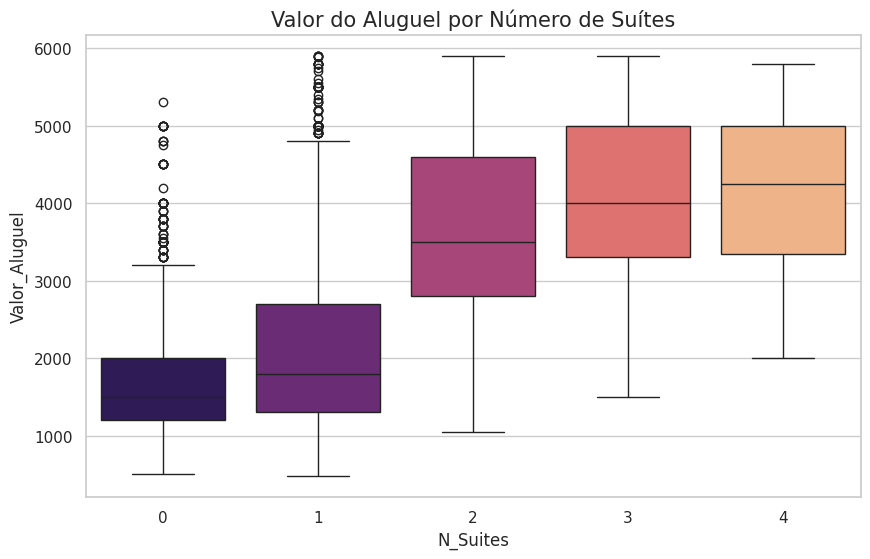

In [58]:
# Gráfico 2: Boxplot (N_Suites vs Valor_Aluguel)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='N_Suites', y='Valor_Aluguel', palette='magma')
plt.title('Valor do Aluguel por Número de Suítes', fontsize=15)
plt.show()

Impacto das Suítes (Boxplot): O número de suítes costuma ser um "divisor de águas". Note se a caixa de "2 suítes" está bem acima da de "1 suíte". Isso indica que o mercado local valoriza muito a privacidade, e um quarto extra sem banheiro não teria o mesmo impacto no preço.

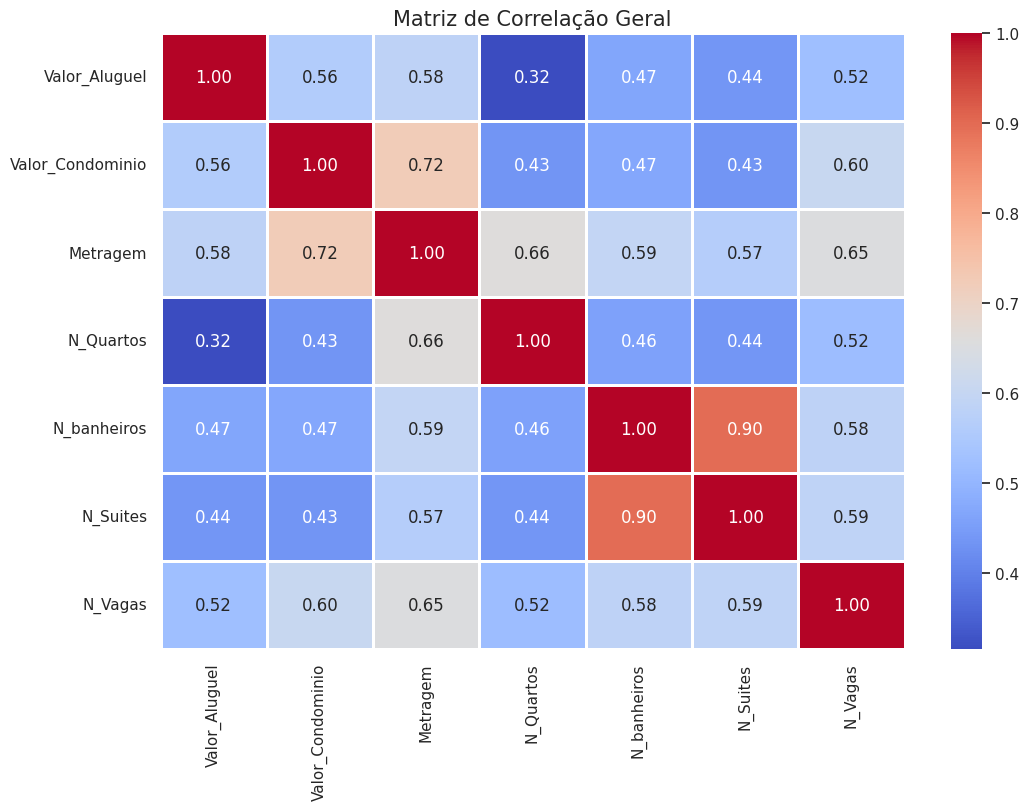

In [59]:
# Gráfico 3: Mapa de Calor (Heatmap) Ampliado
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, annot_kws={"size": 12})
plt.title('Matriz de Correlação Geral', fontsize=15)
plt.show()

Correlação de Variáveis (Heatmap): * Procure o valor entre Valor_Aluguel e Valor_Condominio. Se for alto (> 0.70), significa que prédios com infraestrutura cara também cobram aluguéis caros (correlação direta).

Se N_Vagas tiver correlação baixa, talvez a garagem não seja o foco principal de valorização desse perfil de imóvel.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




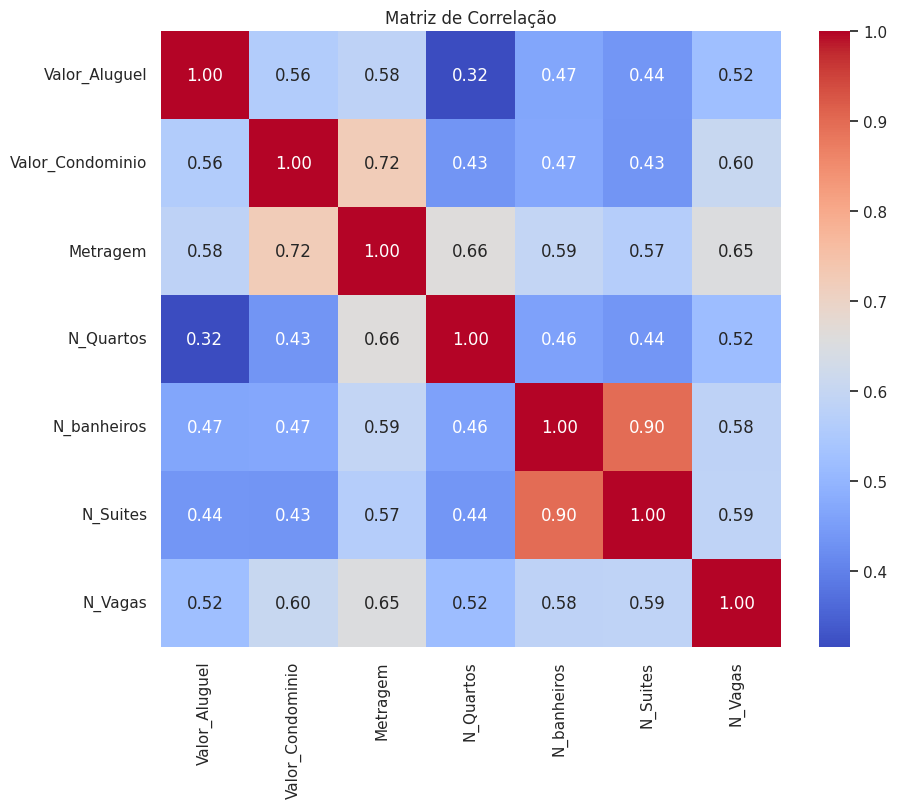

In [60]:
# --- A) Análise de Correlação ---
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [61]:
# Identificando variáveis fortes
print("### A) Variáveis mais fortes para o modelo ###")
# Pegamos a correlação absoluta com o alvo e ordenamos
correlacao_alvo = correlation_matrix['Valor_Aluguel'].abs().sort_values(ascending=False)
print(correlacao_alvo)
print("\nInsight: As variáveis com maior correlação (perto de 1.0) são as melhores preditoras.")

### A) Variáveis mais fortes para o modelo ###
Valor_Aluguel       1.000000
Metragem            0.583438
Valor_Condominio    0.559615
N_Vagas             0.521301
N_banheiros         0.467663
N_Suites            0.437841
N_Quartos           0.315207
Name: Valor_Aluguel, dtype: float64

Insight: As variáveis com maior correlação (perto de 1.0) são as melhores preditoras.



B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [62]:
# --- B) Separação em Treino e Teste ---
# Definindo X (características) e y (o que queremos prever)
X = df_clean.drop(columns=['Valor_Aluguel'])
y = df_clean['Valor_Aluguel']

# Separando 20% para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("-" * 30)
print(f"### B) Divisão dos Dados Concluída ###")
print(f"Total de amostras: {len(df_clean)}")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

------------------------------
### B) Divisão dos Dados Concluída ###
Total de amostras: 6454
Treino: 5163 amostras
Teste: 1291 amostras


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [63]:
X = X_train[['Metragem']]
y = y_train

modelo_simples = LinearRegression()
modelo_simples.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [65]:
intercepto = modelo_simples.intercept_
coeficiente = modelo_simples.coef_[0]

# --- B) Exibição dos Parâmetros e Equação da Reta ---
print(f"Intercepto (b0): {intercepto:.4f}")
print(f"Coeficiente (b1): {coeficiente:.4f}")
print("-" * 50)

print("### EQUAÇÃO EXTENSA DA RETA ###")
# A fórmula é y = b0 + b1 * x
print(f"Valor_Aluguel = {intercepto:.2f} + ({coeficiente:.2f} * Metragem)")

print("-" * 50)
print(f"INTERPRETAÇÃO:")
print(f"Para cada 1m² adicional, o aluguel aumenta, em média, R$ {coeficiente:.2f}.")


Intercepto (b0): 907.9543
Coeficiente (b1): 16.4868
--------------------------------------------------
### EQUAÇÃO EXTENSA DA RETA ###
Valor_Aluguel = 907.95 + (16.49 * Metragem)
--------------------------------------------------
INTERPRETAÇÃO:
Para cada 1m² adicional, o aluguel aumenta, em média, R$ 16.49.


c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [67]:
r2_treino = modelo_simples.score(X, y)

print(f"R² do Treinamento: {r2_treino:.4f}")
print("-" * 50)

R² do Treinamento: 0.3379
--------------------------------------------------


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

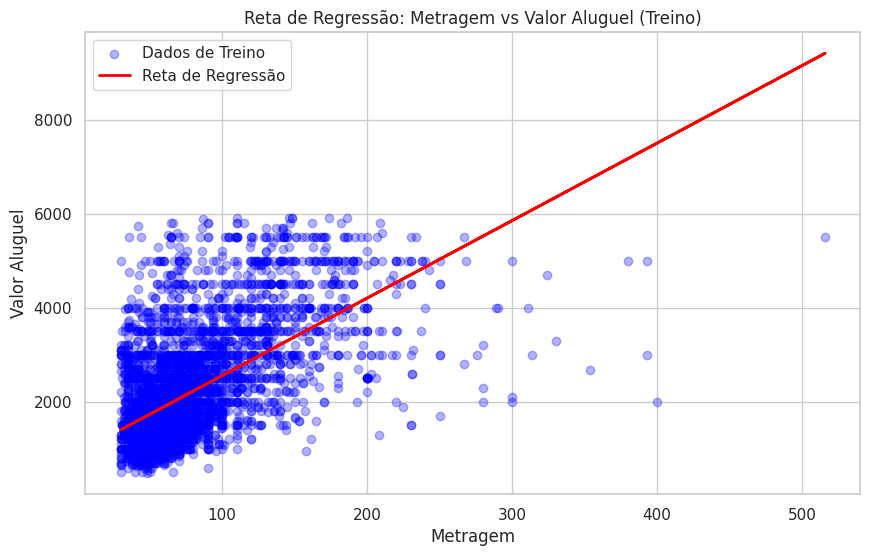

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.3, label='Dados de Treino') # Pontos reais
plt.plot(X, modelo_simples.predict(X), color='red', linewidth=2, label='Reta de Regressão') # Reta prevista
plt.title('Reta de Regressão: Metragem vs Valor Aluguel (Treino)')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [75]:
X_test_final = X_test[['Metragem']]
y_test_final = y_test

In [76]:
previsoes = modelo_simples.predict(X_test_final)

r2_teste = modelo_simples.score(X_test_final, y_test_final)

print(f"R² do Treinamento (visto anteriormente): {r2_treino:.4f}")
print(f"Coeficiente de Determinação (R²) nos Dados de Teste: {r2_teste:.4f}")
print("-" * 50)

R² do Treinamento (visto anteriormente): 0.3379
Coeficiente de Determinação (R²) nos Dados de Teste: 0.3501
--------------------------------------------------


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Avaliação do R²:

Consistência (Positivo): O modelo é estável. Como o valor de teste (0.35) é muito próximo ao de treino (0.33), o modelo não "decorou" os dados; ele realmente aprendeu um padrão que se mantém em dados novos.

Poder Preditivo (Negativo): O valor de 35% é considerado baixo. Isso significa que a Metragem sozinha explica apenas um terço do preço do aluguel. Os outros 65% do valor dependem de variáveis que ficaram de fora (como localização, vagas ou banheiros).

Conclusão
O modelo é confiável, mas incompleto. Ele prova que o tamanho importa, mas não é o fator principal para definir o preço nesse mercado. Para melhorar esse índice, seria necessário evoluir para uma Regressão Múltipla (usando mais colunas do seu arquivo).

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [90]:
X = df_clean.drop(columns=['Valor_Aluguel'])
y = df_clean['Valor_Aluguel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo_multi = LinearRegression()
modelo_multi.fit(X_train, y_train)

LinearRegression()

In [91]:
intercepto = modelo_multi.intercept_
coeficientes = modelo_multi.coef_
nomes_colunas = X_train.columns

print(f"Intercepto (b0): {intercepto:.2f}")
print("\nCoeficientes por variável:")
for nome, coef in zip(nomes_colunas, coeficientes):
    print(f"- {nome}: {coef:.2f}")

Intercepto (b0): 849.91

Coeficientes por variável:
- Valor_Condominio: 0.47
- Metragem: 9.07
- N_Quartos: -202.35
- N_banheiros: 213.97
- N_Suites: -15.89
- N_Vagas: 278.79


In [92]:
r2_treino = modelo_multi.score(X_train, y_train)
print(f"\nR² do Treinamento: {r2_treino:.4f}")


R² do Treinamento: 0.4170


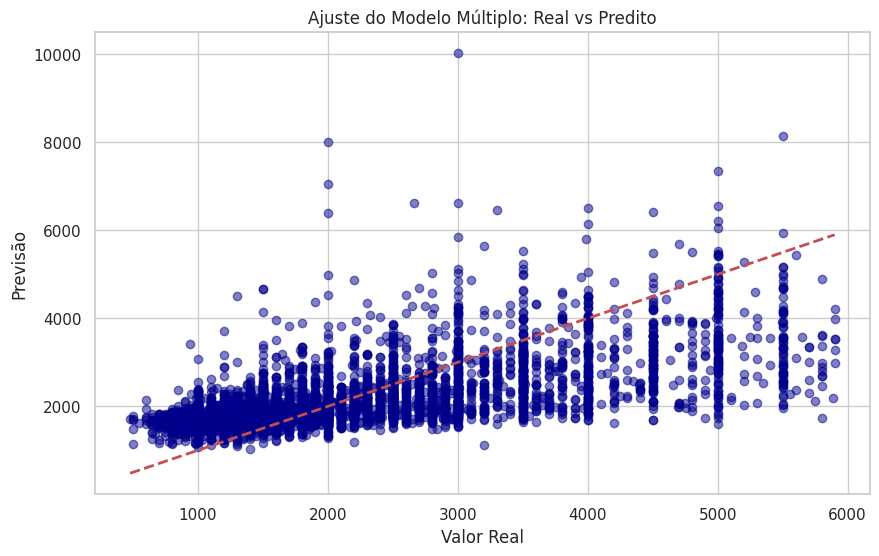

In [93]:
y_pred_train = modelo_multi.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5, color='darkblue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Ajuste do Modelo Múltiplo: Real vs Predito')
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.grid(True)
plt.show()

In [95]:
from sklearn.metrics import r2_score
y_pred_test = modelo_multi.predict(X_test)
r2_teste = r2_score(y_test, y_pred_test)
print(f"R² nos Dados de Teste: {r2_teste:.4f}")

R² nos Dados de Teste: 0.4364


Desempenho ($R^2$): O modelo explica cerca de 42% a 44% do preço. É mais eficaz que o modelo simples (35%), pois considera o conjunto do imóvel (vagas, banheiros, etc.) e não apenas o tamanho.

Fiabilidade: A proximidade entre os valores de Treino (0.4170) e Teste (0.4364) prova que o modelo é estável e generaliza bem para novos dados, sem "decorar" os exemplos (sem overfitting).

Conclusão: O modelo é uma excelente ferramenta para estimativas de base, embora a localização e o estado do imóvel (variáveis ausentes) ainda influenciem os restantes 56% do preço.